## Seismic Tomography

In [6]:
from IPython.display import HTML

####HTML('<iframe width="854" height="422" src="https://www.youtube.com/embed/7zuICgLxSIk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

### Observed and synthectic seismograms

![](flexwin.png)

### Data sizes

| Name | Count/size |
|--------|-------------|
| Seismic events (earthquakes) | 100--1000 |
| Seismic stations that observe each event | 100--1000 |
| Seismograms (observed and synthetic) | 1-1000 TB |
| Elastic structure (3D mesh) | 1-1000 GB |
| Simulate one earthquake | 100-1000 CPU hours |
| Optimization iterations | ~30 |

* Problem: Local minima when high-frequency windows are included in early iterations.

### [Adaptable Seismic Data Format](https://asdf-definition.readthedocs.io/en/latest/big_picture.html) (based on HDF5)

![](https://asdf-definition.readthedocs.io/en/latest/_images/ASDF_container.png)

![](https://camo.githubusercontent.com/5be343ed266374f6108049a952b8be81e984ba27/68747470733a2f2f7261772e6769746875622e636f6d2f6f627370792f776562736974652f6d61737465722f6c6f676f2f6f627370795f6c6f676f5f66756c6c5f686967687265732e706e67)

## Parallelism in Machine Learning

* http://unixer.de/publications/img/distdl-preprint.pdf ([video](https://www.youtube.com/watch?v=xtxxLWZznBI))

![](bennun-parallel-dl.png)

![](bennun-parallel-param.png)

## Curse of dimensionality

In [34]:
%matplotlib inline
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rc('figure', figsize=(12,8))

def hypercube(d):
    return dict(name='hypercube', dim=d, npoints=2**d, volume=1)

def simplex(d):
    return dict(name='simplex', dim=d, npoints=d+1, volume=1/np.math.factorial(d))

df = pandas.DataFrame([hypercube(d) for d in range(1,20)] + [simplex(d) for d in range(1,20)])
df.head()

,name,dim,npoints,volume
0,hypercube,1,2,1.0
1,hypercube,2,4,1.0
2,hypercube,3,8,1.0
3,hypercube,4,16,1.0
4,hypercube,5,32,1.0


In [35]:
df.tail()

,name,dim,npoints,volume
33,simplex,15,16,7.647164e-13
34,simplex,16,17,4.779477e-14
35,simplex,17,18,2.811457e-15
36,simplex,18,19,1.561921e-16
37,simplex,19,20,8.220635e-18


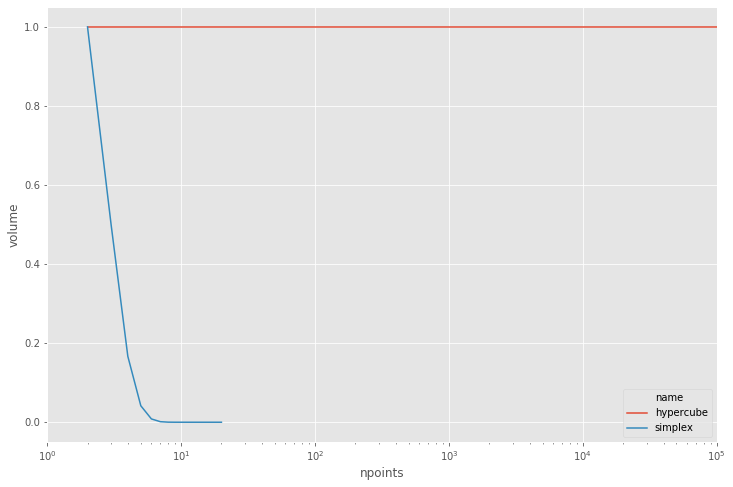

In [36]:
grid = seaborn.lineplot(x='npoints', y='volume', hue='name', data=df)
grid.axes.set(xscale='log', xlim=(1, 1e5));